In [2]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data
#Reads the data from csv file present in data folder into the notebook and stores them as DataFrames in their respective variables.
#A DataFrame is a data structure provided by the Pandas library. It is 2D table-like data structure in pandas used to store datasets with rows and columns.
train = pd.read_csv('../data/train.csv')
features= pd.read_csv('../data/features.csv')
stores=pd.read_csv('../data/stores.csv')

In [8]:
#shape tells us the no of rows and columns in the DataFrame(rows,columns).
#It is used to confirm the data loaded and gives the idea of its size 
print("Train shape:",train.shape)
print("Features shape:",features.shape)
print("Stores Shape:", stores.shape)

Train shape: (421570, 5)
Features shape: (8190, 12)
Stores Shape: (45, 3)


In [31]:
#.head() shows the first five rows in the DataFrame. 
# It gives quick look at structure and the values in dataset.
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Date_converted
0,1,1,2010-02-05,24924.50,False,2010-02-05
1,1,1,2010-02-12,46039.49,True,2010-02-12
2,1,1,2010-02-19,41595.55,False,2010-02-19
3,1,1,2010-02-26,19403.54,False,2010-02-26
4,1,1,2010-03-05,21827.90,False,2010-03-05


In [39]:
#.info() gives summary information about the dataframe.
#Includes column names, data types, non-null counts — useful for spotting missing data or incorrect types
train.info()
features.info()
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6 

In [33]:
#.isnull() returns true or false for each cell in the DataFrame.
#.isnull().sum() adds up all the True values in each column — showing how many missing values each column has.
print(train.isnull().sum())
print(features.isnull().sum())
print(stores.isnull().sum())


Store             0
Dept              0
Date              0
Weekly_Sales      0
IsHoliday         0
Date_converted    0
dtype: int64
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Store    0
Type     0
Size     0
dtype: int64


In [41]:
#pd.to_datatime converts object(string) to datetime format
train['Date']=pd.to_datetime(train['Date'])
print(train['Date'].dtype)
#grouping total weekly sales by date
weekly_sales=train.groupby('Date')['Weekly_Sales'].sum().reset_index()
print(weekly_sales)

datetime64[ns]
          Date  Weekly_Sales
0   2010-02-05   49750740.50
1   2010-02-12   48336677.63
2   2010-02-19   48276993.78
3   2010-02-26   43968571.13
4   2010-03-05   46871470.30
..         ...           ...
138 2012-09-28   43734899.40
139 2012-10-05   47566639.31
140 2012-10-12   46128514.25
141 2012-10-19   45122410.57
142 2012-10-26   45544116.29

[143 rows x 2 columns]


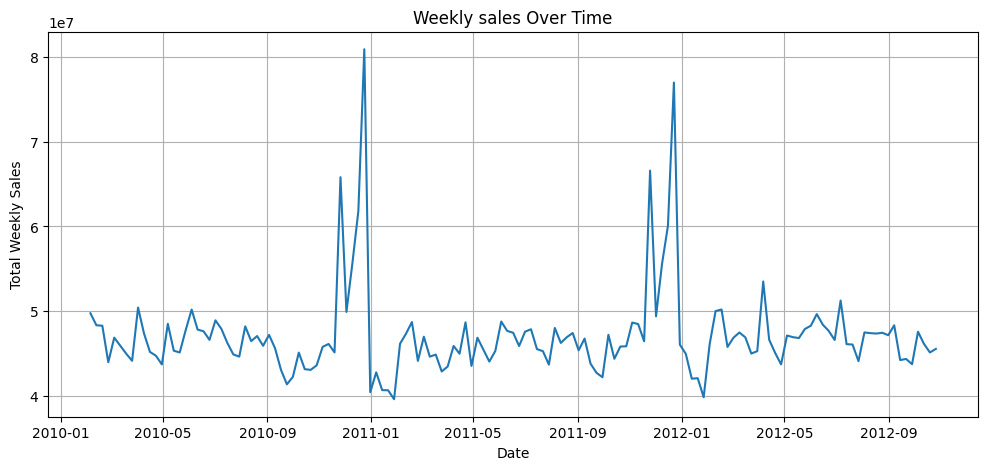

In [45]:
#Plotting line graph to understand weekly sales by date
plt.figure(figsize=(12,5))
sns.lineplot(data=weekly_sales, x='Date',y='Weekly_Sales')
plt.title('Weekly sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

#Business Questions to explore

1. What are the weekly sales trends across all stores?
2. How do holidays impact store sales?
3. Which stores and departments are top-performing?
4. Are there seasonal patterns in sales?
5. Can we predict future weekly sales accurately for planning?